### 1. data loader 

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np


from keras.preprocessing.image import img_to_array
class loader:
    def __init__(self):
        self.x_data=[]
        self.y_data=[]

    def load(self,path):
        files=os.listdir(path)
        for i in files:
            img=cv2.imread(path+'/'+i,cv2.IMREAD_GRAYSCALE)# 400 x 600
            img=cv2.resize(img,(240,240))
            #img=cv2.resize(img,(240,240))
            #print(img.shape)
            self.y_data.append(img_to_array(img))
            self.x_data.append(img_to_array(img))
        return self.x_data,self.y_data


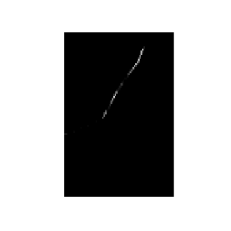

In [2]:

img=cv2.imread('../input/grid-map/111202511.png',cv2.IMREAD_GRAYSCALE)# 400 x 600
img=cv2.resize(img,(240,240)) # 宽 x 高
plt.imshow(img, cmap=plt.cm.gray)
plt.xticks([])  # 去掉x轴
plt.yticks([])  # 去掉y轴
plt.axis('off')  # 去掉坐标轴
plt.show()

In [3]:
from keras.models import Model
from keras.layers import Conv2D,UpSampling2D,MaxPooling2D
from keras.layers import Input
from keras.layers import LeakyReLU
from keras.layers import BatchNormalization
from keras import regularizers

class Models:
    def __init__(self,w,h,c):
        self.w=w
        self.h=h
        self.c=c
    def Arch1(self):
        inp=Input(shape=(self.w,self.h,self.c))
        enc=Conv2D(64,(3,3),padding='same')(inp)
        enc=BatchNormalization()(enc)
        enc=LeakyReLU(alpha=0.1)(enc)
        enc=MaxPooling2D(pool_size=(2,2))(enc)
        enc=Conv2D(32,(3,3),padding='same')(enc)
        enc=LeakyReLU(alpha=0.1)(enc)
        enc=BatchNormalization()(enc)
        enc=MaxPooling2D(pool_size=(2,2))(enc)
        enc=Conv2D(16,(3,3),padding='same')(enc)
        enc=LeakyReLU(alpha=0.1)(enc)
        enc=BatchNormalization()(enc)
        enc=MaxPooling2D(pool_size=(2,2))(enc)
        enc=Conv2D(8,(3,3),padding='same')(enc)
        enc=LeakyReLU(alpha=0.1)(enc)
        enc=MaxPooling2D(pool_size=(2,2))(enc)


        dec=Conv2D(8,(3,3),padding='same')(enc)
        dec=LeakyReLU(alpha=0.1)(dec)
        dec=UpSampling2D((2,2))(dec)
        dec=Conv2D(16,(3,3),padding='same')(dec)
        dec=LeakyReLU(alpha=0.1)(dec)
        dec=UpSampling2D((2,2))(dec)
        dec=Conv2D(32,(3,3),padding='same')(dec)
        dec=LeakyReLU(alpha=0.1)(dec)
        dec=UpSampling2D((2,2))(dec)
        dec=Conv2D(64,(3,3),padding='same')(dec)
        dec=LeakyReLU(alpha=0.1)(dec)
        dec=UpSampling2D((2,2))(dec)
        final=Conv2D(1,(3,3),padding='same',activation='sigmoid')(dec)
        auto=Model(inp,final)
        return auto

    def Arch2(self):
        inp=Input(shape=(self.w,self.h,self.c))
        enc=Conv2D(64,(3,3),padding='same',activity_regularizer=regularizers.l1(10e-5))(inp)
        enc=BatchNormalization()(enc)
        enc=LeakyReLU(alpha=0.1)(enc)
        enc=MaxPooling2D(pool_size=(2,2))(enc)
        enc=Conv2D(32,(3,3),padding='same',activity_regularizer=regularizers.l1(10e-5))(enc)
        enc=LeakyReLU(alpha=0.1)(enc)
        enc=BatchNormalization()(enc)
        enc=MaxPooling2D(pool_size=(2,2))(enc)
        enc=Conv2D(16,(3,3),padding='same',activity_regularizer=regularizers.l1(10e-5))(enc)
        enc=LeakyReLU(alpha=0.1)(enc)
        enc=BatchNormalization()(enc)
        enc=MaxPooling2D(pool_size=(2,2),activity_regularizer=regularizers.l1(10e-5))(enc)
        enc=Conv2D(8,(3,3),padding='same')(enc)
        enc=LeakyReLU(alpha=0.1)(enc)
        enc=MaxPooling2D(pool_size=(2,2))(enc)


        dec=Conv2D(8,(3,3),padding='same',activity_regularizer=regularizers.l1(10e-5))(enc)
        dec=LeakyReLU(alpha=0.1)(dec)
        dec=UpSampling2D((2,2))(dec)
        dec=Conv2D(16,(3,3),padding='same',activity_regularizer=regularizers.l1(10e-5))(dec)
        dec=LeakyReLU(alpha=0.1)(dec)
        dec=UpSampling2D((2,2))(dec)
        dec=Conv2D(32,(3,3),padding='same',activity_regularizer=regularizers.l1(10e-5))(dec)
        dec=LeakyReLU(alpha=0.1)(dec)
        dec=UpSampling2D((2,2))(dec)
        dec=Conv2D(64,(3,3),padding='same',activity_regularizer=regularizers.l1(10e-5))(dec)
        dec=LeakyReLU(alpha=0.1)(dec)
        dec=UpSampling2D((2,2))(dec)
        final=Conv2D(1,(3,3),padding='same',activation='sigmoid')(dec)
        auto=Model(inp,final)
        return auto


## main 函数：

In [4]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import adam_v2

w=240
h=240
c=1

## 数据载入、训练集和测试集划分
load_img=loader()
x_data,y_data=load_img.load('../input/grid-map')
x_data=np.array(x_data,dtype='float')/255.0
y_data=np.array(y_data,dtype='float')/255.0
train_x,test_x,train_y,test_y=train_test_split(x_data,y_data,test_size=0.1,random_state=30)

In [5]:
## 模型载入
model=Models(w,h,c)
auto_encoder=model.Arch2()
auto_encoder.summary()

auto_encoder.compile(optimizer='adadelta',loss='binary_crossentropy')
auto_encoder.fit(train_x,train_y,batch_size=4,shuffle='true',epochs=30,validation_data=(test_x,test_y),verbose=1)
auto_encoder.save('noise.MODEL')

opt=adam_v2.Adam(learning_rate=0.001,decay=0.001/50)


2022-05-05 13:09:16.783010: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-05 13:09:16.909554: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-05 13:09:16.910642: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-05 13:09:16.913496: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 240, 240, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 240, 240, 64)      640       
_________________________________________________________________
batch_normalization (BatchNo (None, 240, 240, 64)      256       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 240, 240, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 120, 120, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 120, 120, 32)      18464     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 120, 120, 32)      0     

2022-05-05 13:09:19.667098: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 748569600 exceeds 10% of free system memory.
2022-05-05 13:09:20.928451: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 748569600 exceeds 10% of free system memory.
2022-05-05 13:09:21.752321: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 748569600 exceeds 10% of free system memory.
2022-05-05 13:09:22.287655: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 748569600 exceeds 10% of free system memory.
2022-05-05 13:09:22.885822: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30


2022-05-05 13:09:24.827095: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


813/813 [==============================] - 24s 20ms/step - loss: 68.9778 - val_loss: 57.1450
Epoch 2/30
813/813 [==============================] - 15s 19ms/step - loss: 50.5322 - val_loss: 44.5183
Epoch 3/30
813/813 [==============================] - 15s 19ms/step - loss: 39.8077 - val_loss: 36.5858
Epoch 4/30
813/813 [==============================] - 15s 19ms/step - loss: 33.8940 - val_loss: 31.7633
Epoch 5/30
813/813 [==============================] - 15s 19ms/step - loss: 29.5962 - val_loss: 27.8837
Epoch 6/30
813/813 [==============================] - 15s 19ms/step - loss: 26.1142 - val_loss: 24.6726
Epoch 7/30
813/813 [==============================] - 15s 19ms/step - loss: 23.1875 - val_loss: 21.9400
Epoch 8/30
813/813 [==============================] - 15s 19ms/step - loss: 20.6841 - val_loss: 19.6479
Epoch 9/30
813/813 [==============================] - 15s 19ms/step - loss: 18.5249 - val_loss: 17.7321
Epoch 10/30
813/813 [==============================] - 16s 19ms/step - loss

2022-05-05 13:17:12.796473: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
